<a href="https://colab.research.google.com/github/Shafiq-Abdu/abdulrahman.github.io/blob/main/MACD_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://blog.quantinsti.com/indicator-trading-strategies/

### Install packages

In [5]:
!pip install backtrader==1.9.78.123
!pip install panda
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install backtesting
!pip install ta


ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [14]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4485    0  4485    0     0  13370      0 --:--:-- --:--:-- --:--:-- 13388
100  517k  100  517k    0     0   515k      0  0:00:01  0:00:01 --:--:-- 1477k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4481    0  4481    0     0  15608      0 --:--:-- --:--:-- --:--:-- 15667
100  392k  100  392k    0     0   535k      0 --:--:-- --:--:-- --:--:-- 1583k


In [26]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## Data from yfinance

In [27]:
# symbol = input("Enter the stock symbol in caps(e.g., ^NSEI): ")

# # Get user input for start date (year, month, day)
# start_year = int(input("Enter start year (YYYY): "))
# start_month = int(input("Enter start month (MM): "))
# start_day = int(input("Enter start day (DD): "))
# start_date = datetime(start_year, start_month, start_day)

# # Get user input for end date (year, month, day)
# end_year = int(input("Enter end year (YYYY): "))
# end_month = int(input("Enter end month (MM): "))
# end_day = int(input("Enter end day (DD): "))
# end_date = datetime(end_year, end_month, end_day)

# # Download data using yfinance
# data = yf.download(symbol, start=start_date, end=end_date)


Enter the stock symbol in caps(e.g., ^NSEI): ^NSEI
Enter start year (YYYY): 2023
Enter start month (MM): 1
Enter start day (DD): 1
Enter end year (YYYY): 2023
Enter end month (MM): 12
Enter end day (DD): 23
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100
2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700
2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200
2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900
2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200
...,...,...,...,...,...,...
2023-12-18,21434.800781,21482.800781,21365.349609,21418.650391,21418.650391,249700
2023-12-19,21477.650391,21505.050781,21337.750000,21453.099609,21453.099609,249800
2023-12-20,21543.500000,21593.000000,21087.349609,21150.150391,21150.150391,363900


In [28]:
data = yf.download('AAPL', '2015-01-01', '2023-12-07')

[*********************100%%**********************]  1 of 1 completed


 calculate the Moving Average Convergence Divergence (MACD) technical indicator using the talib.MACD function from the talib library. MACD is a trend-following momentum indicator that helps to identify changes in the strength, direction, and momentum of a stock price’s trend.

Parameters used in MACD function are as follows:

data['Close']: This is the closing price of the stock, which is used to calculate the MACD.
fastperiod=12: The fast period represents the number of days used for the fast Exponential Moving Average (EMA). In this case, it is set to 12.
slowperiod=26: The slow period represents the number of days used for the slow Exponential Moving Average (EMA). In this case, it is set to 26.
signalperiod=9: The signal period represents the number of days used for the signal line, which is an Exponential Moving Average of the MACD line. In this case, it is set to 9.
The above mentioned parameters are standard ones or are set by default. We have used these for illustrative purposes.

## Calculate Moving Average Convergence Divergence (MACD)

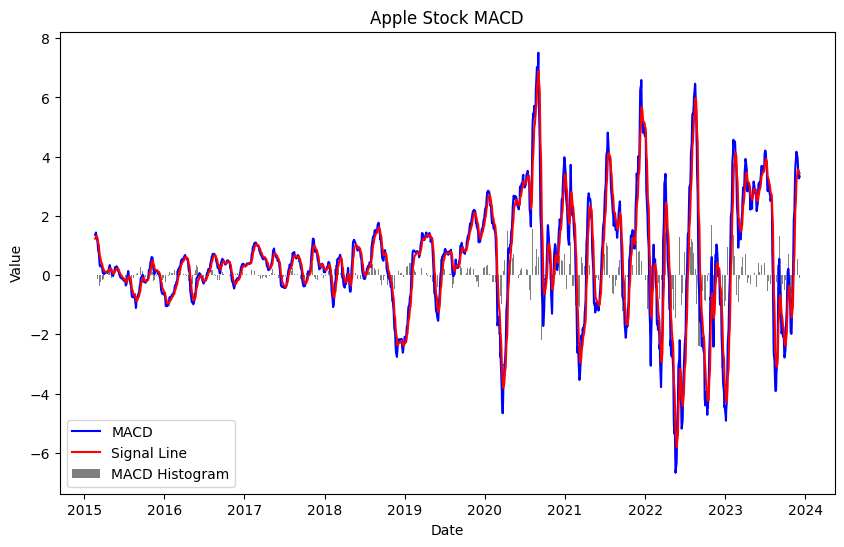

In [19]:
# Calculate Moving Average Convergence Divergence (MACD)
data['macd'], data['macd_signal'], data['macd_hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['macd'], label='MACD', color='blue')
plt.plot(data.index, data['macd_signal'], label='Signal Line', color='red')
plt.bar(data.index, data['macd_hist'], label='MACD Histogram', color='gray')
plt.title('Apple Stock MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Plot Cumulative Returns

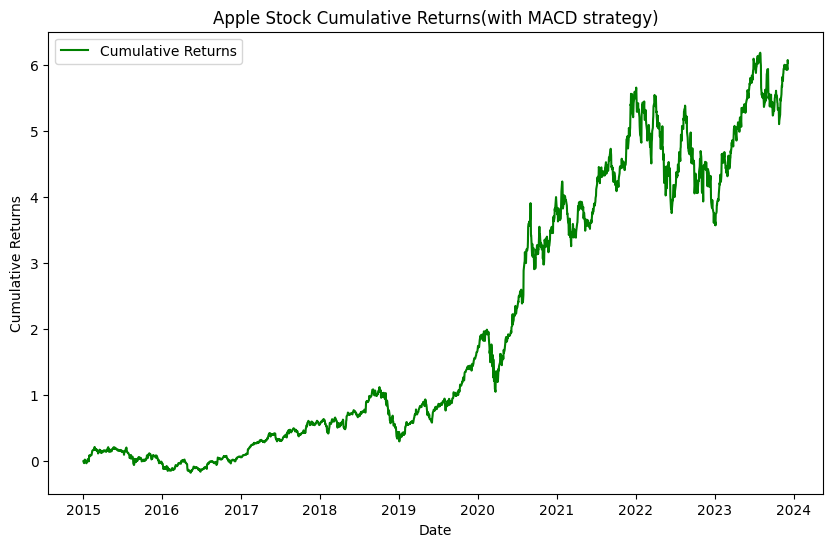

In [20]:
data['cumulative_returns'] = (data['Close'] / data['Close'].iloc[0]) - 1

# Plot Cumulative Returns
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cumulative_returns'], label='Cumulative Returns', color='green')
plt.title('Apple Stock Cumulative Returns(with MACD strategy)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

##Plot Cumulative Returns(optimised)

Best Parameters: Fast Period=13, Slow Period=20, Signal Period=8
Total Profit/Loss with Best Parameters: 198.64%


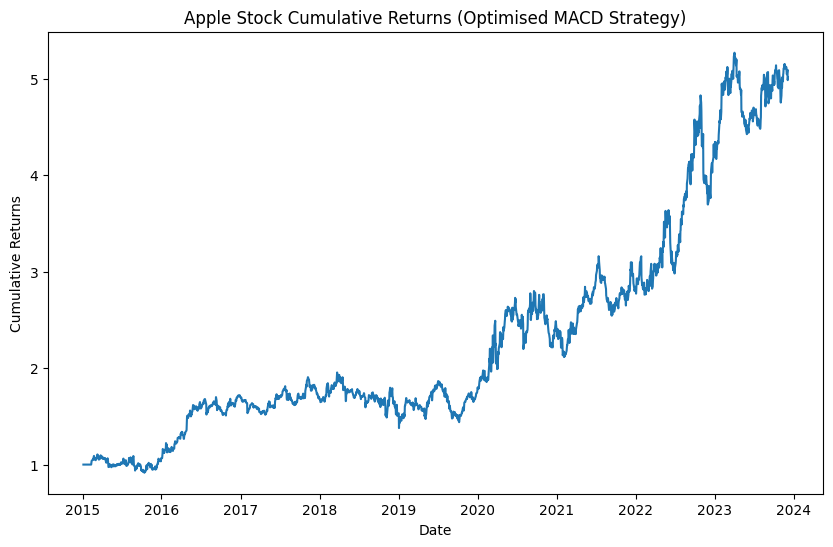

In [21]:
def calculate_profit_loss(data, fast_period, slow_period, signal_period):
    data['macd'], data['macd_signal'], data['macd_hist'] = talib.MACD(data['Close'], fastperiod=fast_period, slowperiod=slow_period, signalperiod=signal_period)
    data['Signal'] = 0


    # Generate buy/sell signals based on MACD crossover
    data.loc[data['macd'] > data['macd_signal'], 'Signal'] = 1
    data.loc[data['macd'] < data['macd_signal'], 'Signal'] = -1


    # Calculate daily returns based on the signals
    data['Return'] = data['Close'].pct_change() * data['Signal'].shift()


    # Calculate cumulative returns and total profit/loss
    data['Cumulative_Return'] = (1 + data['Return']).cumprod()
    total_profit_loss = data['Return'].sum()


    return total_profit_loss, data


def optimize_macd_strategy(data):
    best_params = None
    best_profit_loss = -np.inf


    # Grid search for optimal parameters
    for fast_period in range(10, 21):
        for slow_period in range(20, 41):
            for signal_period in range(5, 11):
                if fast_period >= slow_period:
                    continue
                profit_loss, _ = calculate_profit_loss(data.copy(), fast_period, slow_period, signal_period)
                if profit_loss > best_profit_loss:
                    best_profit_loss = profit_loss
                    best_params = (fast_period, slow_period, signal_period)


    return best_params, best_profit_loss




# Optimise MACD strategy
best_params, best_profit_loss = optimize_macd_strategy(data)
fast_period, slow_period, signal_period = best_params


print("Best Parameters: Fast Period={}, Slow Period={}, Signal Period={}".format(fast_period, slow_period, signal_period))
print("Total Profit/Loss with Best Parameters: {:.2f}%".format(best_profit_loss * 100))


# Calculate and plot cumulative returns with best parameters
total_profit_loss, data_optimized = calculate_profit_loss(data, fast_period, slow_period, signal_period)
plt.figure(figsize=(10, 6))
plt.plot(data_optimized.index, data_optimized['Cumulative_Return'])
plt.title('Apple Stock Cumulative Returns (Optimised MACD Strategy)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

## Comparision strategy and optimised

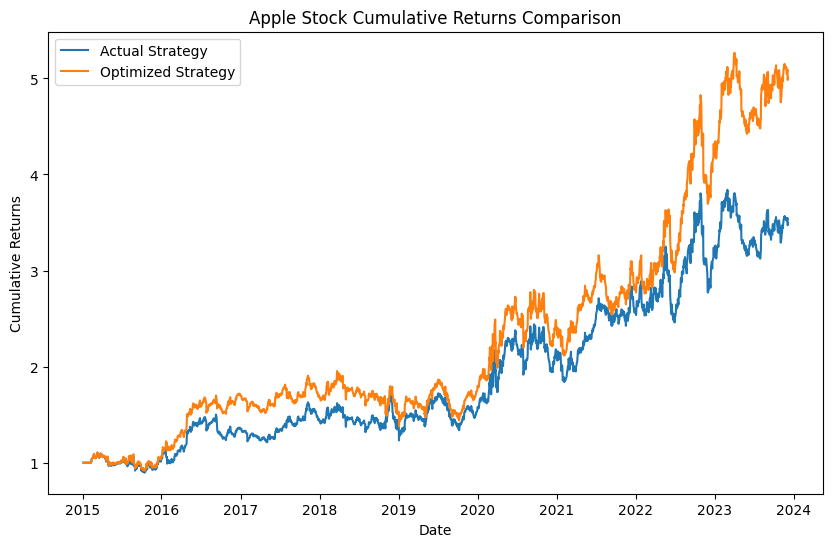

In [30]:
# Calculating actual strategy's returns
_, data_actual = calculate_profit_loss(data.copy(), fast_period=16, slow_period=20, signal_period=8)

# Calculating optimised strategy's returns
_, data_optimized = calculate_profit_loss(data.copy(), fast_period, slow_period, signal_period)

# Comparing actual and optimised strategy
plt.figure(figsize=(10, 6))
plt.plot(data.index, data_actual['Cumulative_Return'], label='Actual Strategy')
plt.plot(data.index, data_optimized['Cumulative_Return'], label='Optimized Strategy')
plt.title('Apple Stock Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()